# Chapitre 1 - Les limites des bases de données relationnelles et des tableaux de données persistés

Dans ce premier chapitre, nous explorerons la raison pour laquelle des bases de donneés relationnelles classiques ou encore de tableaux de données persistés en mémoire vive ont une limite, en termes de volumétrie de données traitées, mais aussi en terme d'analyses statistiques et autres algorithmes de Data Science.

## 1.1. Les limites des bases de données relationnelles

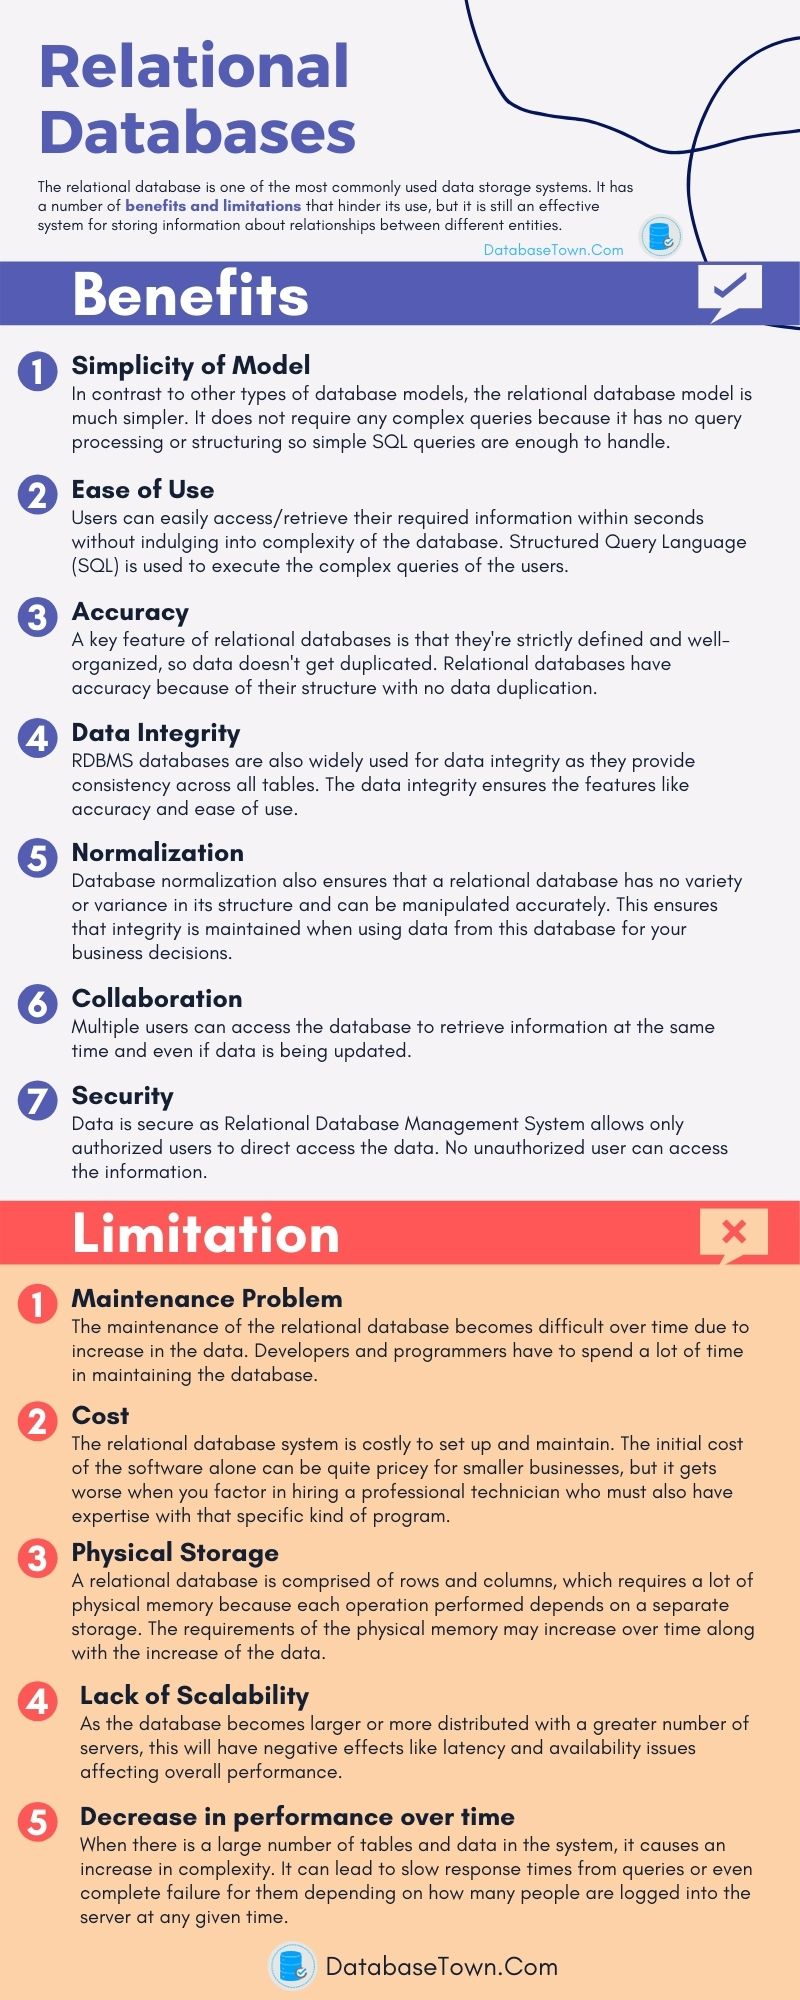

De manière générale, comme le montre bien l'infographie au-dessus, les bases de données relationnelles assurent de multiples avantages pour traiter un modèle de données spécifiques, en collaboration avec de multiples acteurs, possédant des droits très différents. Le langage SQL permet aussi une interaction standardisée avec ce type de bases de données, en faisant un outil simple et puissant pour le management de la donnée, notamment en informatique décisionnelle traditionnelle.

Le problème de ce modèle traditionnel repose dans un aspect important dans le traitement de la donnée massive : la **scalabilité**.

La scalabilité définit la propension d'un système de données à assurer un changement de dimensions facilement. On va distinguer deux types de scalabilité :    


*   La **scalabilité verticale** ou scaling up, concerne l'habileté à rendre le traitement de la donnée plus rapide, plus efficient, le tout lié à une volumétrie de plus en plus importante. Concrètement, cela signifie une habileté à déployer facilement des serveurs de traitement de la donnée plus puissants, sans impacter le système de données, mais aussi d'être capable d'encaisser une volumétrie de plus en plus importante. 
*   La **scalabilité horizontale** ou scaling out, concerne l'habileté à paralléliser le traitement de la donnée facilement. Concrètement, cela signifie être capable de gérer de multiples accès concurrentiels à la base de données, et être capable de récupérer la donnée massive par batch, afin d'éviter la récupération séquentielle (une ligne après l'autre) de quantités de données trop importantes.



De manière générale, si une base de données SQL gèrera relativement bien l'accès concurrentiel à la base de données, de par le principe d'[acidité](https://en.wikipedia.org/wiki/ACID), une "queue" s'installera rapidement si plusieurs clients tentent d'accéder à la même donnée, allongeant artificiellement le temps de traitement de la donnée, empêchant *de facto* une bonne scalabilité horizontale. De plus, la physicalité des disques et de la mémoire vive utilisés par la base de données empêchera aussi une bonne scalabilité verticale, limitée matériellement par ces conditions physiques.

La solution réside donc dans deux aspects :

*   Le premier consiste en l'utilisation de moteurs de bases de données différents, plus adaptés aux circonstances du projet utilisant des données massives. En vrac, on imagine des moteurs orientés colonnes ou clé/valeur pour des séries temporelles, ou encore des bases de données orientées document, pour des données ayant des modèles hétérogènes, ou encore des bases de données de type "Datalake" pour le stockage et le traitement de format de données exotiques (images, vidéeos, fichiers audio etc...)
*   Le second consiste en la virtualisation des systèmes de stockage et de persistance de la donnée, afin de pouvoir déployer facilement des moyens adapatés à la situation.



Pour cela, aujourd'hui, il existe de nombreuses solutions propriétaires hébergées sur le cloud. Nous aborderons le cas de Google BigQuery dans le Chapitre 3.

## 1.2. Les limites des tableaux de données persistés

Ce qu'on entend par tableaux de données persistés est l'ensemble des technologies permettant de gérer des données indexées et labellisées, à travers un langage de programmation standard. L'un des plus communément utilisés aujourd'hui est le package Pandas en Python, qui permet de gérer de la donnée orientée colonne, à partir d'un principe de *DataFrames* et de *Series*.

In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(df.dtypes)
df

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


Ci-dessus, un `pandas.DataFrame` qui comporte 9 colonnes correspondant à diverses caractéristiques moyennes d'habitations californiennes par municipalité. Chaque colonne est une `pandas.Series` d'un type défini en amont (entier, flottant, booléen, chaîne de caractères...) et peut être parcouru de la même manière qu'une liste en Python. La [documentation Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) est là pour vous rappeler l'utilisation de ce format de données orientées colonnes.

Pour se rafraîchir la mémoire, manipulons un peu ce `DataFrame` à travers quelques petits ateliers.

### Atelier Pandas : les habitations californiennes

Le `DataFrame` est consituté de 9 colonnes, où chaque ligne correspond aux caractéristiques pour une municipalité :   

*   `longitude` et `latitude` correspondent aux coordonnées géographiques de la municipalité
*   `housing_median_age` correspond à l'âge médian des habitations de la municipalité 
*   `total_rooms` correspond au nombre de pièces habitables dans la ville (en milliers)
*   `total_bedrooms` correspond au nombre de chambres (en milliers)
*   `population` correspond à la population en milliers d'habitants
*   `households` correspond au nombre d'habitations (en milliers)
*   `median_income` correspond au revenu médian de la municipalité
*   `median_house_value` correspond à la valeur médiane d'une habitaiton dans la municipalité

Ci-dessous une description brève du `DataFrame`.



In [2]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


#### Exercice 1

Récupérez la moyenne et la médiane des revenus médians des villes de plus d'un million d'habitants.

In [3]:
# TODO
df1 = df[df['population'] >= 1000]
#print(df1)
revenu_median_californien = df1["median_income"].median()
print(df1["median_income"].mean())
print(revenu_median_californien)


3.792205222222216
3.5103999999999997


#### Exercice 2

Afficher la matrice de corrélation entre chacune des variables du `DataFrame`. Dans la bulle de texte plus bas, en faire des déductions décrivant les phénomènes. (Google est votre ami pour trouver la fonction Pandas permettant de le faire. 😀)

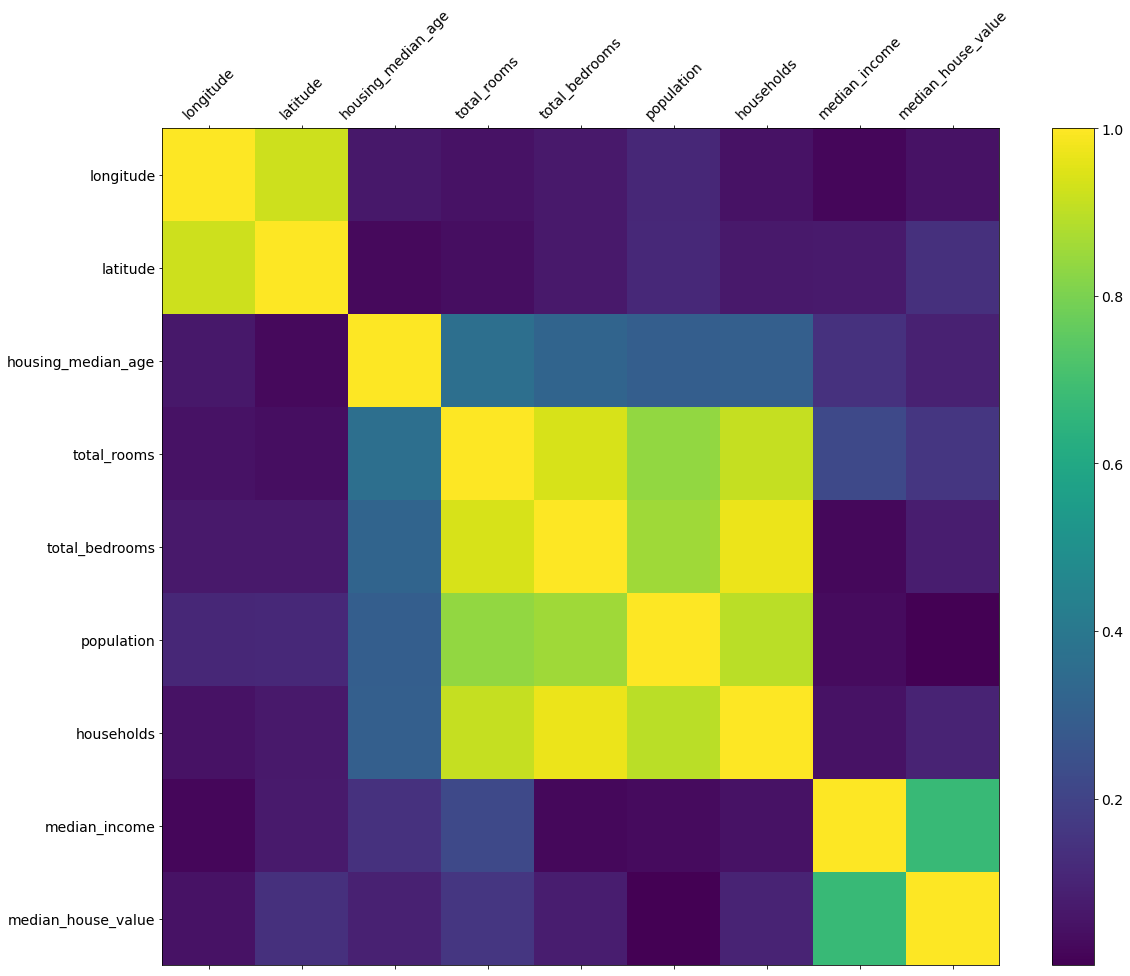

In [4]:
import matplotlib.pyplot as plt

def plot_corr_matrix(corr_mat):
    f = plt.figure(figsize=(19, 15))
    plt.matshow(corr_mat.abs(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)

# TODO : passer votre matrice de corrélation en paramètres de la fonction plot_corr_matrix pour l'afficher
df_corr = df.corr()
plot_corr_matrix(df_corr)

Déductions : 

Plus il y a d'habitants, plus il y a d'habitations, plus il y a de pièces habitables, et donc de chambres.

La longitute est corrélée à la latitude.

Le revenu median est assez corrélé avec la valeur médiane de la maison.

Les autres variables sont peu ou pas corrélées

#### Exercice 3
Créer une nouvelle colonne qui correspondra à la différence entre le revenu median d'une municipalité avec le revenu médian californien.

In [5]:
# TODO
df["difference"] = df["median_income"] - df["median_income"].median()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,difference
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,3.12135
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,0.11185
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,2.30625
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,2.64875
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,-0.54965
...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,-2.30815
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,-0.09655
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,-1.19765
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,-0.21635


### Atelier Pandas : les limites de Pandas dans le traitement de la donnée massive

Tout d'abord, exécutez la cellule ci-dessous, pour importer votre espace de stockage Google Drive à cet environnement Colab.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Après avoir déposé le fichier `WeatherEvents_Jan2016-Dec2020.csv` dans votre espace Drive, vous devriez le voir apparaître dans la liste des fichiers accessibles dans la barre de tâches à gauche de l'écran. Modifier le chemin d'accès dans la cellule ci-dessous, pour y mettre le lien vers votre fichier CSV.

In [7]:
weather_csv_path = "/content/drive/MyDrive/WeatherEvents_Jan2016-Dec2020.csv"

Exécutez la cellule ci-dessous, et constatez l'usage important qu'il en découle de la RAM.

In [8]:
big_df = pd.read_csv(weather_csv_path)
big_df.info(memory_usage="deep")
# L'utilisation de la mémoire est alors de 4 GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   EventId         object 
 1   Type            object 
 2   Severity        object 
 3   StartTime(UTC)  object 
 4   EndTime(UTC)    object 
 5   TimeZone        object 
 6   AirportCode     object 
 7   LocationLat     float64
 8   LocationLng     float64
 9   City            object 
 10  County          object 
 11  State           object 
 12  ZipCode         float64
dtypes: float64(3), object(10)
memory usage: 4.0 GB


In [9]:
big_df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


Comme vous pouvez le constater, la lecture d'un fichier CSV d'à peine 720 Mo occupe plus de 4 Go de mémoire vive. La raison est simple : un `Pandas.DataFrame` est une liste de `Series`, accompagnée par son lot de métadonnées et de tâches préexécutées qui facilitent l'utilisation de ce type de données tabulaires. De plus, pour un accès simplifié à la donnée et une homogénéité des types de données, Pandas infère automatiquement la donnée à un type associé.

Dans notre cas, on peut constater que les coordonnées de longitude, latitude et codes postaux sont automatiquement stockés dans des `float64` qui occupe chacun 8 octets. 

Si cette homogénéité de types et cette inférence automatisée est pratique lorsque l'on manipule des données tabulaires à petite échelle, elle est clairement sous-optimale pour le traitement de la donnée massive.

Dans notre cas, mettons que nous voulons accéder aux relevés d'une période précise. Il nous faudra, directement dans la mémoire vive :     


*   modifier les colonnes horodatées pour les transtyper au format `datetime` au runtime
*   appliquer un filtre booléen sur les quatre années de données (et les 4 Go en mémoire vive) pour en sortir la donnée nécessaire



#### Exercice 4

Récupérez les données dont le début d'événement est entre le 30 décembre 2018 et le 05 mars 2019. Constatez l'usage de la RAM (voir en haut à droite de l'écran) et le temps d'exécution

In [10]:
from datetime import datetime

# Les bornes des intervalles

start_date = datetime.strptime("2018-12-30", "%Y-%m-%d")
end_date = datetime.strptime("2019-03-05", "%Y-%m-%d")

# Transtypage des colonnes de date vers des nouvelles colonnes du DataFrame (voir https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

big_df["StartTime(UTC)"] = pd.to_datetime(big_df["StartTime(UTC)"])
big_df["EndTime(UTC)"] = pd.to_datetime(big_df["EndTime(UTC)"])
print(big_df.dtypes)

print(big_df.info(memory_usage="deep"))
# Après la conversion des dates du type string en type date, on remarque que l'utilisation de la mémoire passe à 3,6GB
# On voit donc que les datetime prennent moins de place que certains types object

# Récupération des lignes concernées dans un nouveau DataFrame (voir https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates)

mask = (big_df['StartTime(UTC)'] > start_date) & (big_df['EndTime(UTC)'] <= end_date)
big_df_new = big_df.loc[mask]
big_df_new


EventId                   object
Type                      object
Severity                  object
StartTime(UTC)    datetime64[ns]
EndTime(UTC)      datetime64[ns]
TimeZone                  object
AirportCode               object
LocationLat              float64
LocationLng              float64
City                      object
County                    object
State                     object
ZipCode                  float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   EventId         object        
 1   Type            object        
 2   Severity        object        
 3   StartTime(UTC)  datetime64[ns]
 4   EndTime(UTC)    datetime64[ns]
 5   TimeZone        object        
 6   AirportCode     object        
 7   LocationLat     float64       
 8   LocationLng     float64       
 9   City            object        
 10  County 

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
1271,W-1272,Snow,Light,2018-12-31 14:54:00,2018-12-31 15:18:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1272,W-1273,Snow,Light,2018-12-31 15:36:00,2018-12-31 20:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1273,W-1274,Snow,Light,2018-12-31 21:53:00,2019-01-01 19:36:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1274,W-1275,Snow,Light,2019-01-02 01:54:00,2019-01-02 02:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1275,W-1276,Cold,Severe,2019-01-03 10:54:00,2019-01-03 11:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6273445,W-6275388,Snow,Light,2019-03-02 23:43:00,2019-03-03 02:53:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273446,W-6275389,Fog,Moderate,2019-03-03 04:53:00,2019-03-03 06:53:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273447,W-6275390,Fog,Moderate,2019-03-03 07:25:00,2019-03-03 08:06:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
6273448,W-6275391,Fog,Moderate,2019-03-03 09:53:00,2019-03-03 10:44:00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


#### Exercice 5

Rajouter une colonne "Season" au `DataFrame` dont les valeurs seront :    


*   "Winter" si la `StartTime(UTC)` est entre le 21 décembre et le 20 mars
*   "Spring" si la `StartTime(UTC)` est entre le 21 mars et le 20 juin
*   "Summer" si la `StartTime(UTC)` est entre le 21 juin et le 22 septembre
*   "Fall" si la `StartTime(UTC)` est entre le 23 septembre et le 20 décembre

Faites usage de la fonction [apply de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html).

Constatez l'usage de la RAM (voir en haut à droite de l'écran) et le temps d'exécution

In [11]:
# Les bornes des saisons

from datetime import date, datetime

Y = 2000  # Année bidon pour générer une date complète
seasons = [('winter', (datetime(Y,  1,  1),  datetime(Y,  3, 20))),
           ('spring', (datetime(Y,  3, 21),  datetime(Y,  6, 20))),
           ('summer', (datetime(Y,  6, 21),  datetime(Y,  9, 22))),
           ('autumn', (datetime(Y,  9, 23),  datetime(Y, 12, 20))),
           ('winter', (datetime(Y, 12, 21),  datetime(Y, 12, 31)))]

#print(seasons[2][1])

def function_season(date):
  datation = date.replace(year=2000, hour=0, minute=0, second=0)
  res = ""
  for i in range(len(seasons)):
    if (datation >= seasons[i][1][0] and datation <= seasons[i][1][1]):
      res = seasons[i][0]
      break
  return(res)

# Création de la colonne Season
liste_index = big_df_new.index.tolist()
big_df["Season"] = big_df["StartTime(UTC)"].apply(function_season)

# Le temps d'exécution est de plus d'une minute

In [12]:
# Compte le nombre de valeurs de chaque saison
big_df.groupby(by="Season").count()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
Season,,,,,,,,,,,,,
autumn,1494328,1494328,1494328,1494328,1494328,1494328,1494328,1494328,1494328,1491869,1494328,1494328,1482378
spring,1565024,1565024,1565024,1565024,1565024,1565024,1565024,1565024,1565024,1562028,1565024,1565024,1552838
summer,1417902,1417902,1417902,1417902,1417902,1417902,1417902,1417902,1417902,1415011,1417902,1417902,1407926
winter,1796952,1796952,1796952,1796952,1796952,1796952,1796952,1796952,1796952,1793615,1796952,1796952,1782427


#### Exercice 6
A l'aide de la fonction `info`, constatez à nouveau l'espace occupé par votre DataFrame en mémoire.

In [13]:
big_df.info(memory_usage="deep")
# L'usage mémoire marqué est toujours 3,6GB, mais la colonne rajoutée a surement ajouté de l'espace, la précision ne nous permet pas de le remarquer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274206 entries, 0 to 6274205
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   EventId         object        
 1   Type            object        
 2   Severity        object        
 3   StartTime(UTC)  datetime64[ns]
 4   EndTime(UTC)    datetime64[ns]
 5   TimeZone        object        
 6   AirportCode     object        
 7   LocationLat     float64       
 8   LocationLng     float64       
 9   City            object        
 10  County          object        
 11  State           object        
 12  ZipCode         float64       
 13  Season          object        
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 3.6 GB


Les opérations que vous avez effectuées dans l'exercice 5 constituent des opérations dites de "MapReduce", c'est-à-dire, comme en programmation fonctionnelle, des opérations qui s'appliquent sur l'ensemble du jeu de données, afin d'en récupérer, dans le cas du "Map" (`apply` dans Pandas) un tableau de même dimension, où dans le cas du "Reduce" un vecteur d'une dimension inférieure (une liste si on a appliqué un "Reduce" sur un tableau 2D, un point si c'était un vecteur).

Compte tenu de la persistance des données en mémoire vive de ces données, ce genre d'opérations courante dans le cadre du traitement de la donnée massive, il faudrait des RAM bien trop importantes lorsque l'on souhaite traiter des jeux de données de l'ordre de la dizaine de Go ou plus. Vous aurez pu constater l'usage décuplé de la RAM (au delà de 5 Go de RAM) pour un simple jeu de données d'un poids initial d'à peine plus de 700 Mo.

Ces traitements, hautement parallélisables, car ne dépendant pas d'un résultat précédent, pourraient profiter d'un traitement par batch avec une persistance des résultats sur des types de mémoires moins onéreux (SSD ou HDD). Des technologies de ce type existent, et nous les découvrirons ensemble dans le chapitre 2...